In [125]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [126]:
# Variables
RANDOM_STATE = 42
TEST_SIZE = 0.25
LABEL = 'Label'

feature_names = [
    'area',
    'perimeter',
    'aspect_ratio',
    'extent',
    'convex_hull_area',           # Area of the convex hull
    'hull_perimeter',              # Perimeter of the convex hull
    'solidity',                    # Ratio of area to convex hull area
    'circularity',                 # Measure of how circular the shape is
    'eccentricity',                # Measure of the elongation of the shape
    'num_convexity_defects',       # Number of convexity defects
    'max_defect_depth',            # Maximum depth of convexity defects
    'major_axis_length',           # Length of the major axis of the fitted ellipse
    'minor_axis_length',           # Length of the minor axis of the fitted ellipse
    'orientation',                  # Orientation angle of the fitted ellipse
    'hu_moment'
]

In [127]:
# Dataset
df = pd.read_csv('data/hand_gesture_features.csv')

df

,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment,Label
0,60724.0,1621.646749,1.333333,0.790677,76241.0,1116.000000,0.796474,0.290173,0.447915,1.0,235.000000,241.312500,215.751755,133.278488,0.621017,r
1,60445.5,1646.516807,1.333333,0.787051,76241.0,1116.000000,0.792821,0.280183,0.634597,1.0,240.000000,233.384323,180.369568,91.904564,0.606884,r
2,59216.0,1648.617313,1.333333,0.771042,76241.0,1116.000000,0.776695,0.273785,0.634806,1.0,243.000000,235.519623,181.979309,82.844833,0.588031,r
3,57783.0,1567.470124,1.333333,0.752383,75251.0,1098.000000,0.767870,0.295537,0.655539,1.0,155.464844,238.082703,179.790863,103.452454,0.598022,r
4,58772.5,1471.546243,1.333333,0.765267,76241.0,1116.000000,0.770878,0.341064,0.337401,1.0,140.000000,220.356644,207.435120,75.904945,0.580492,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,61911.5,2261.383899,1.333333,0.806139,76241.0,1116.000000,0.812050,0.152136,0.707590,1.0,270.000000,243.392731,171.986954,70.090508,0.645903,s
129,58101.5,1753.761533,1.333333,0.756530,76129.0,1114.017853,0.763198,0.237387,0.827617,1.0,181.882812,293.556641,164.771530,86.125656,0.598049,s
130,62467.5,1644.600067,1.333333,0.813379,76241.0,1116.000000,0.819343,0.290231,0.732268,1.0,169.000000,257.612030,175.437958,83.831741,0.620844,s
131,66942.0,2211.553384,1.333333,0.871641,76241.0,1116.000000,0.878032,0.171994,0.841670,1.0,280.000000,350.435547,189.232574,88.366371,0.676107,s


In [138]:
# Find all records with missing values
nan_records = df[df.isna().any(axis=1)]

nan_records

,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment,Label


In [129]:
# Split dataset
train_X, test_X, train_y, test_y = train_test_split(df.drop(LABEL, axis=1), df[LABEL], test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [130]:
# Functions

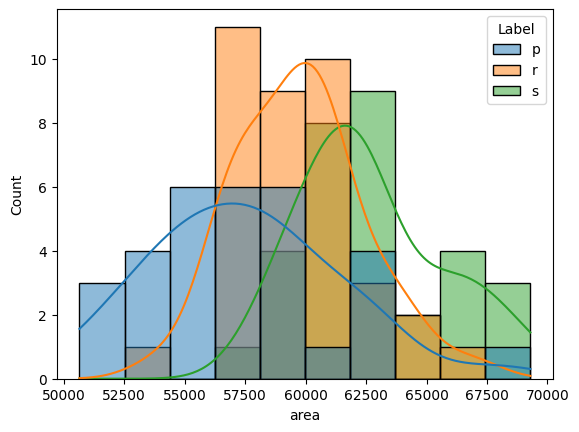

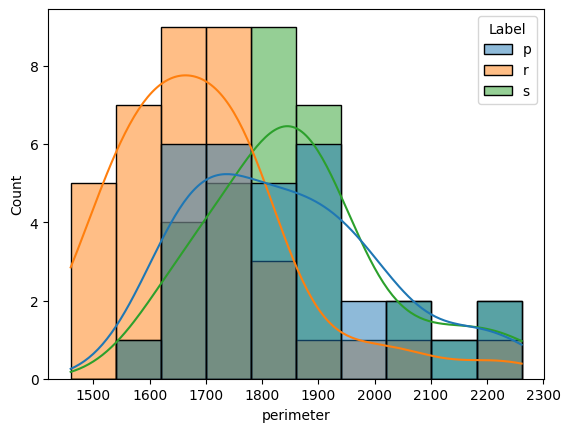

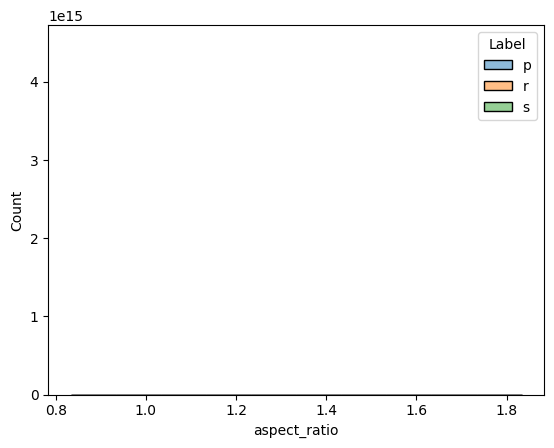

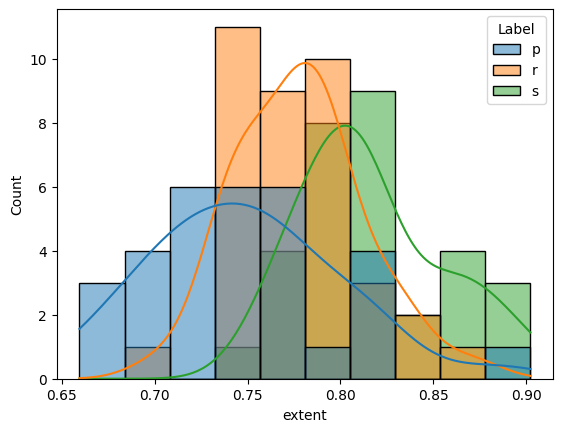

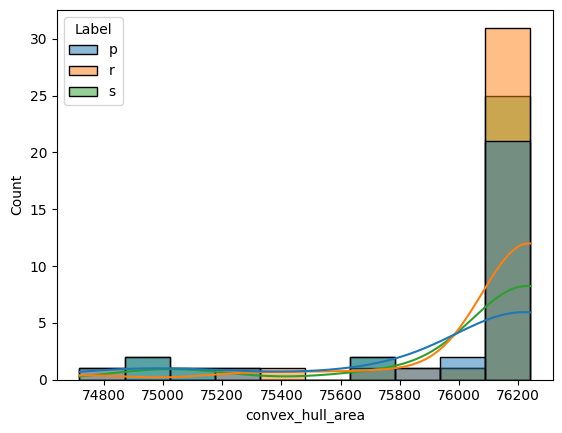

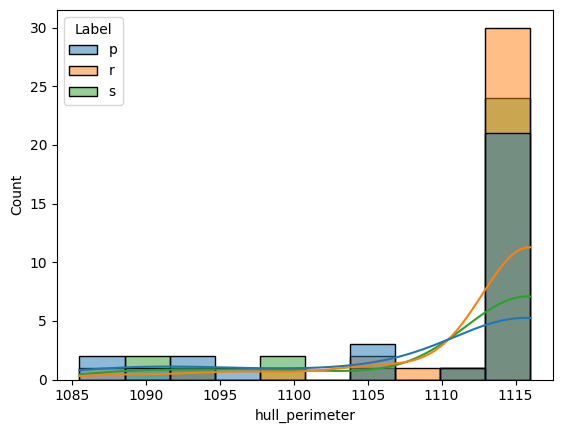

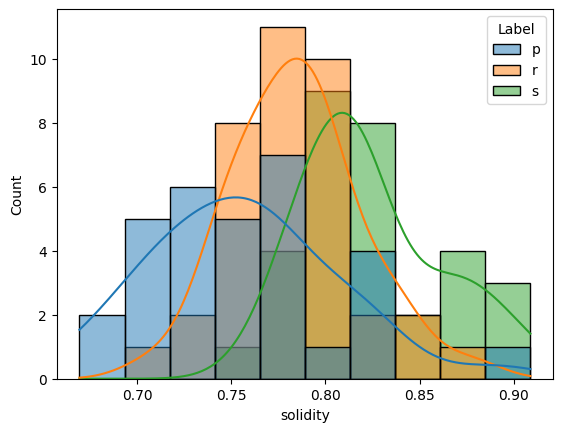

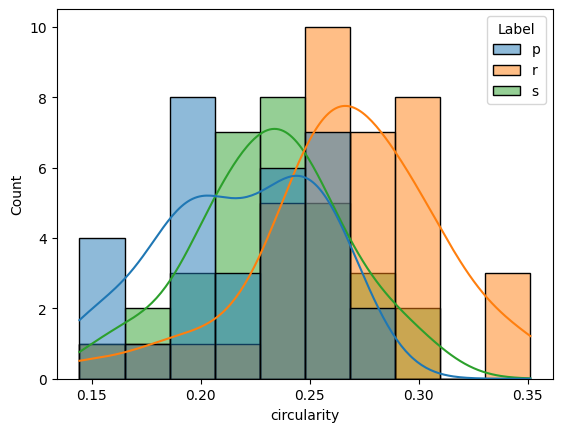

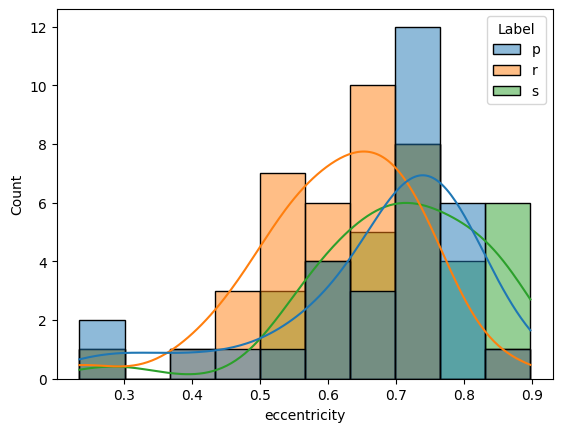

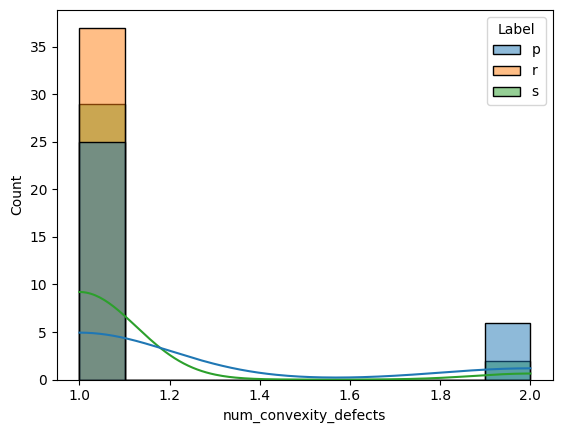

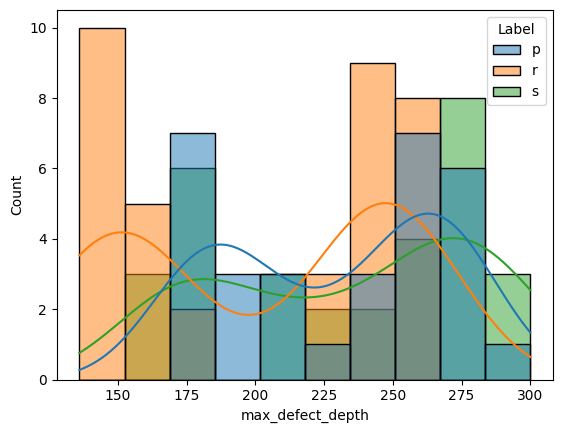

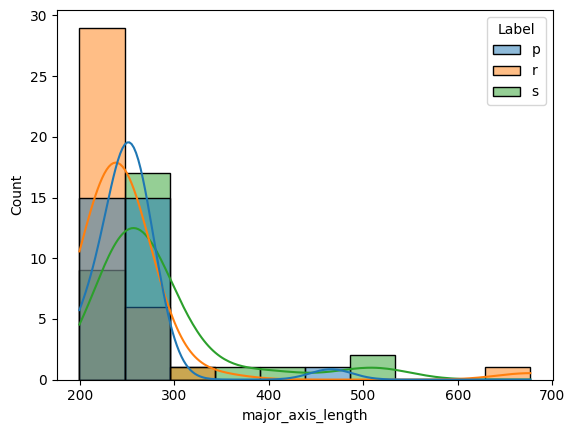

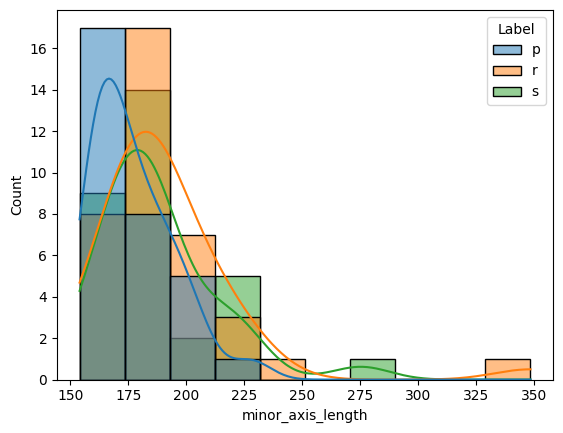

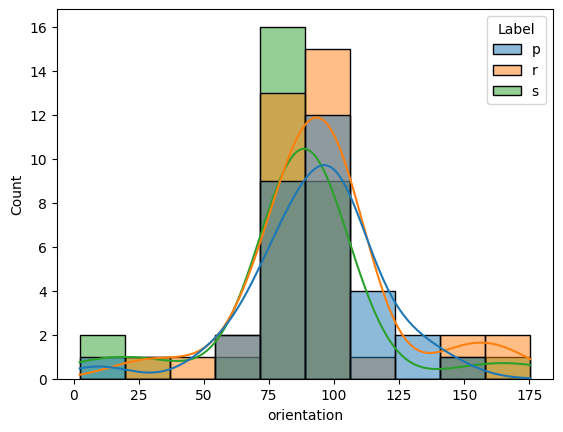

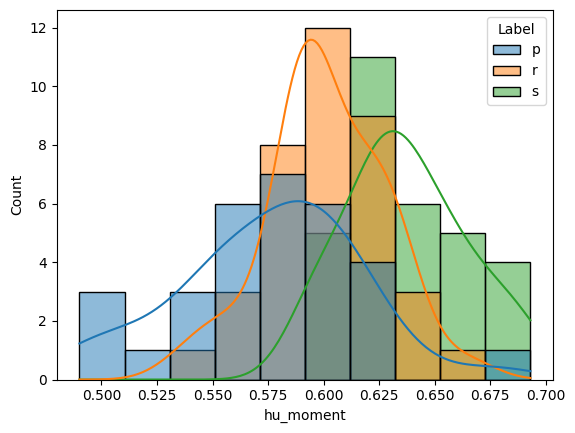

In [131]:
# Histograms
for feature in feature_names:
    sns.histplot(train_X, x=feature, hue=train_y, kde=True, bins=10)
    plt.show()

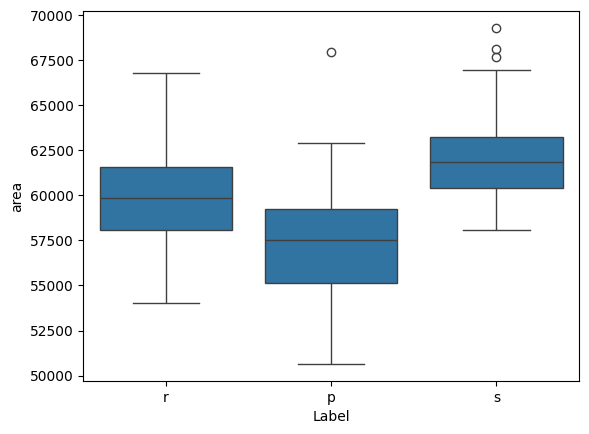

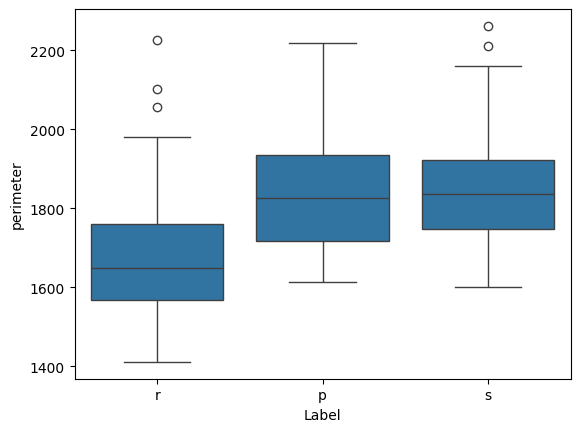

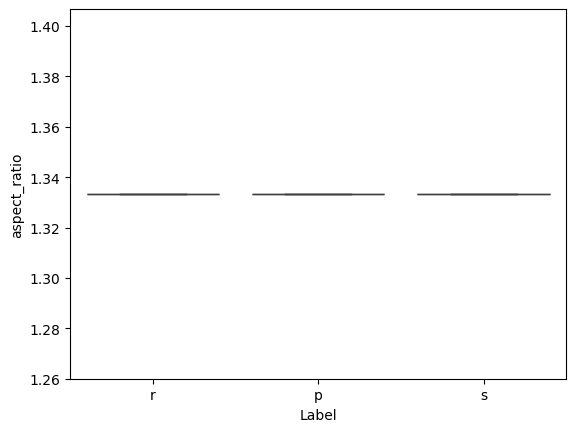

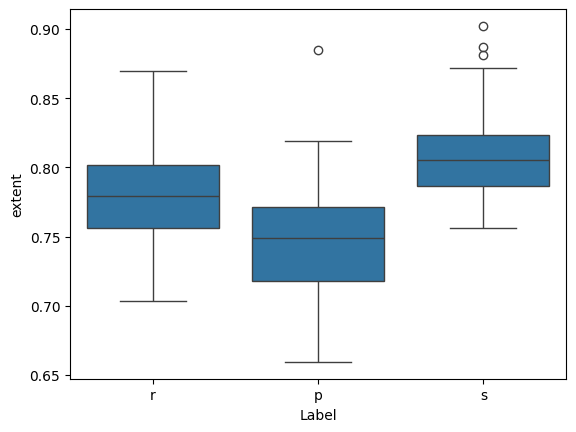

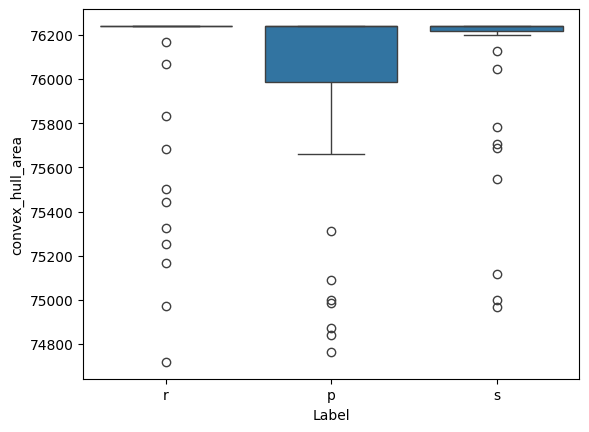

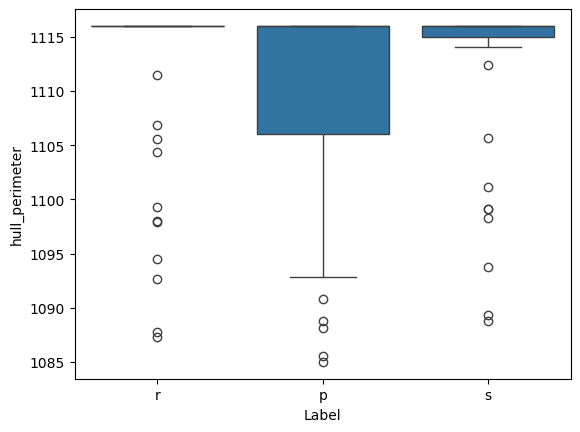

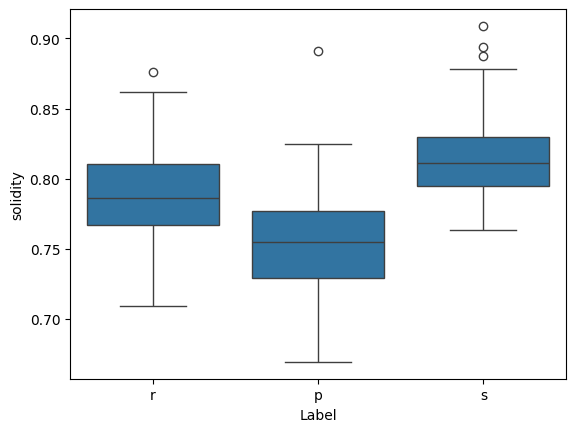

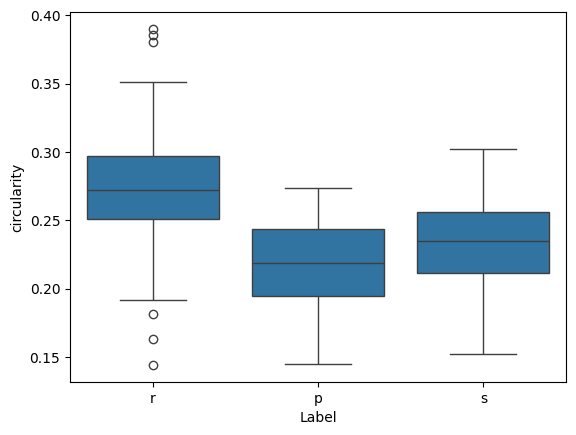

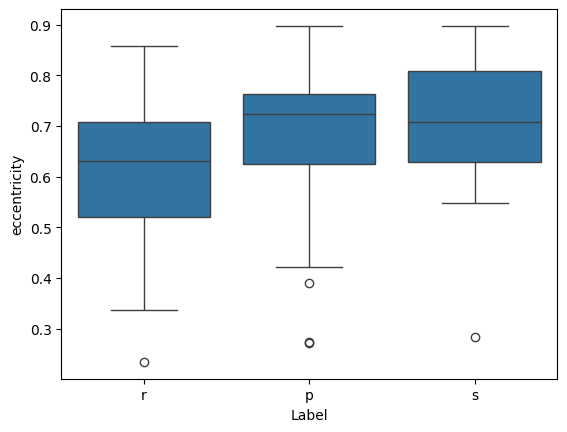

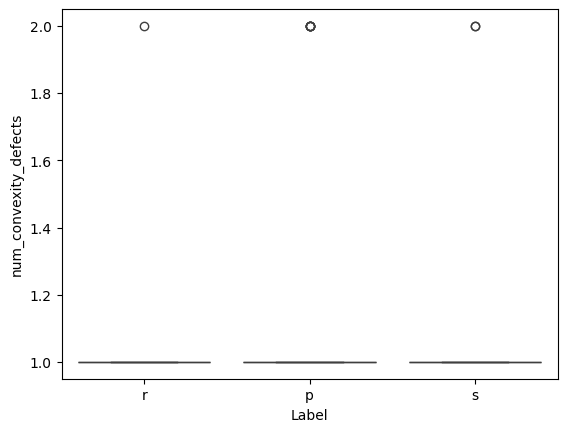

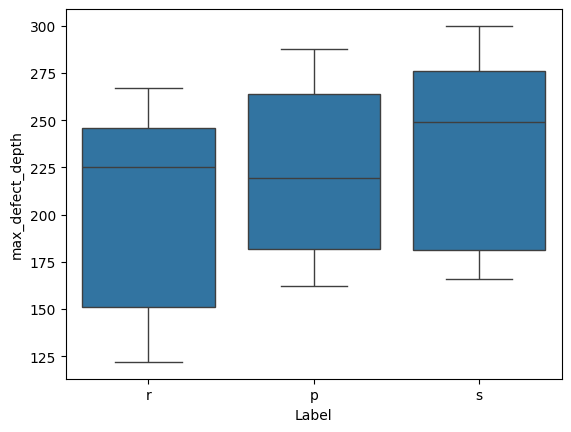

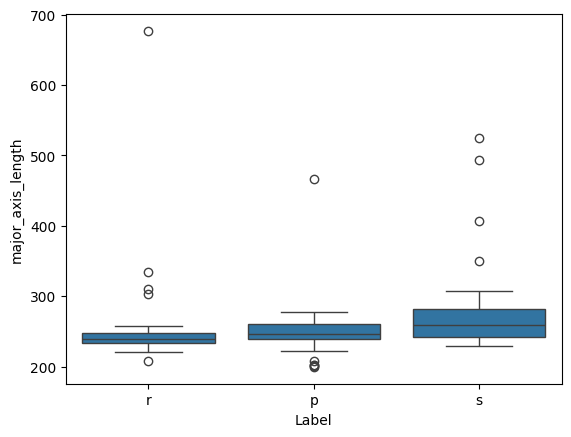

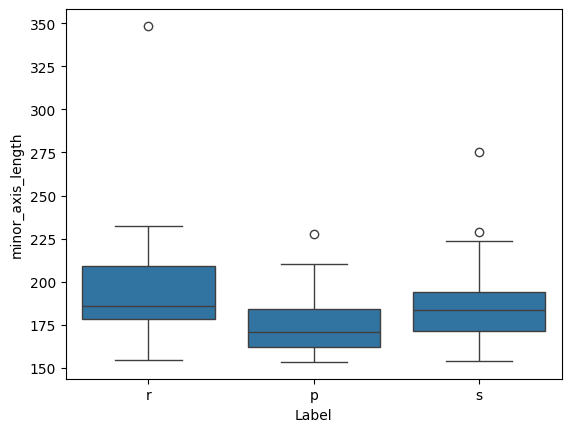

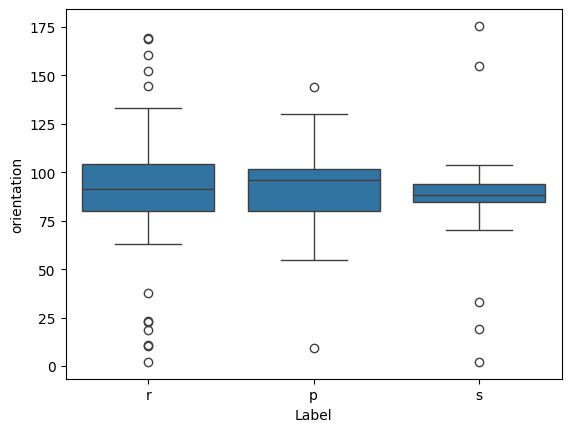

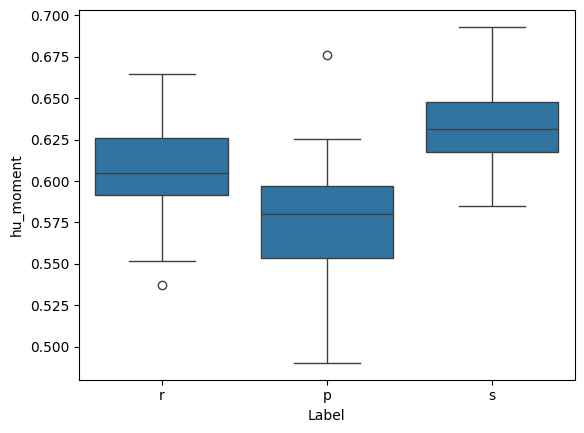

In [132]:
# Boxplots
# Create boxplots for each feature but with the 3 labels separate
for feature in feature_names:
    sns.boxplot(x=LABEL, y=feature, data=df)
    plt.show()

In [133]:
# Correlation matrix
# Calculate the correlation coefficient
corr = train_X.corr()
corr


,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment
area,1.000000,0.240360,NaN,1.000000,0.365899,0.356188,0.997139,0.057407,0.177909,-0.309390,0.326795,0.476334,0.413545,-0.099713,0.935915
perimeter,0.240360,1.000000,NaN,0.240360,0.194738,0.117312,0.230636,-0.938440,0.279875,0.150947,0.409233,0.157314,-0.113911,-0.268902,0.256445
aspect_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extent,1.000000,0.240360,NaN,1.000000,0.365899,0.356188,0.997139,0.057407,0.177909,-0.309390,0.326795,0.476334,0.413545,-0.099713,0.935915
convex_hull_area,0.365899,0.194738,NaN,0.365899,1.000000,0.972998,0.294604,-0.078038,-0.089896,-0.401320,0.041160,0.077466,0.137836,-0.131543,0.153206
hull_perimeter,0.356188,0.117312,NaN,0.356188,0.972998,1.000000,0.286677,-0.004967,-0.105363,-0.437164,-0.014048,0.078792,0.153158,-0.112091,0.125671
solidity,0.997139,0.230636,NaN,0.997139,0.294604,0.286677,1.000000,0.065771,0.188988,-0.285571,0.331346,0.481967,0.413421,-0.091555,0.948837
circularity,0.057407,-0.938440,NaN,0.057407,-0.078038,-0.004967,0.065771,1.000000,-0.255672,-0.237197,-0.359796,-0.038434,0.237710,0.244198,0.026202
eccentricity,0.177909,0.279875,NaN,0.177909,-0.089896,-0.105363,0.188988,-0.255672,1.000000,0.197688,0.088874,0.517710,-0.262585,-0.016645,0.205696
num_convexity_defects,-0.309390,0.150947,NaN,-0.309390,-0.401320,-0.437164,-0.285571,-0.237197,0.197688,1.000000,-0.050074,-0.018849,-0.192976,-0.019900,-0.215802


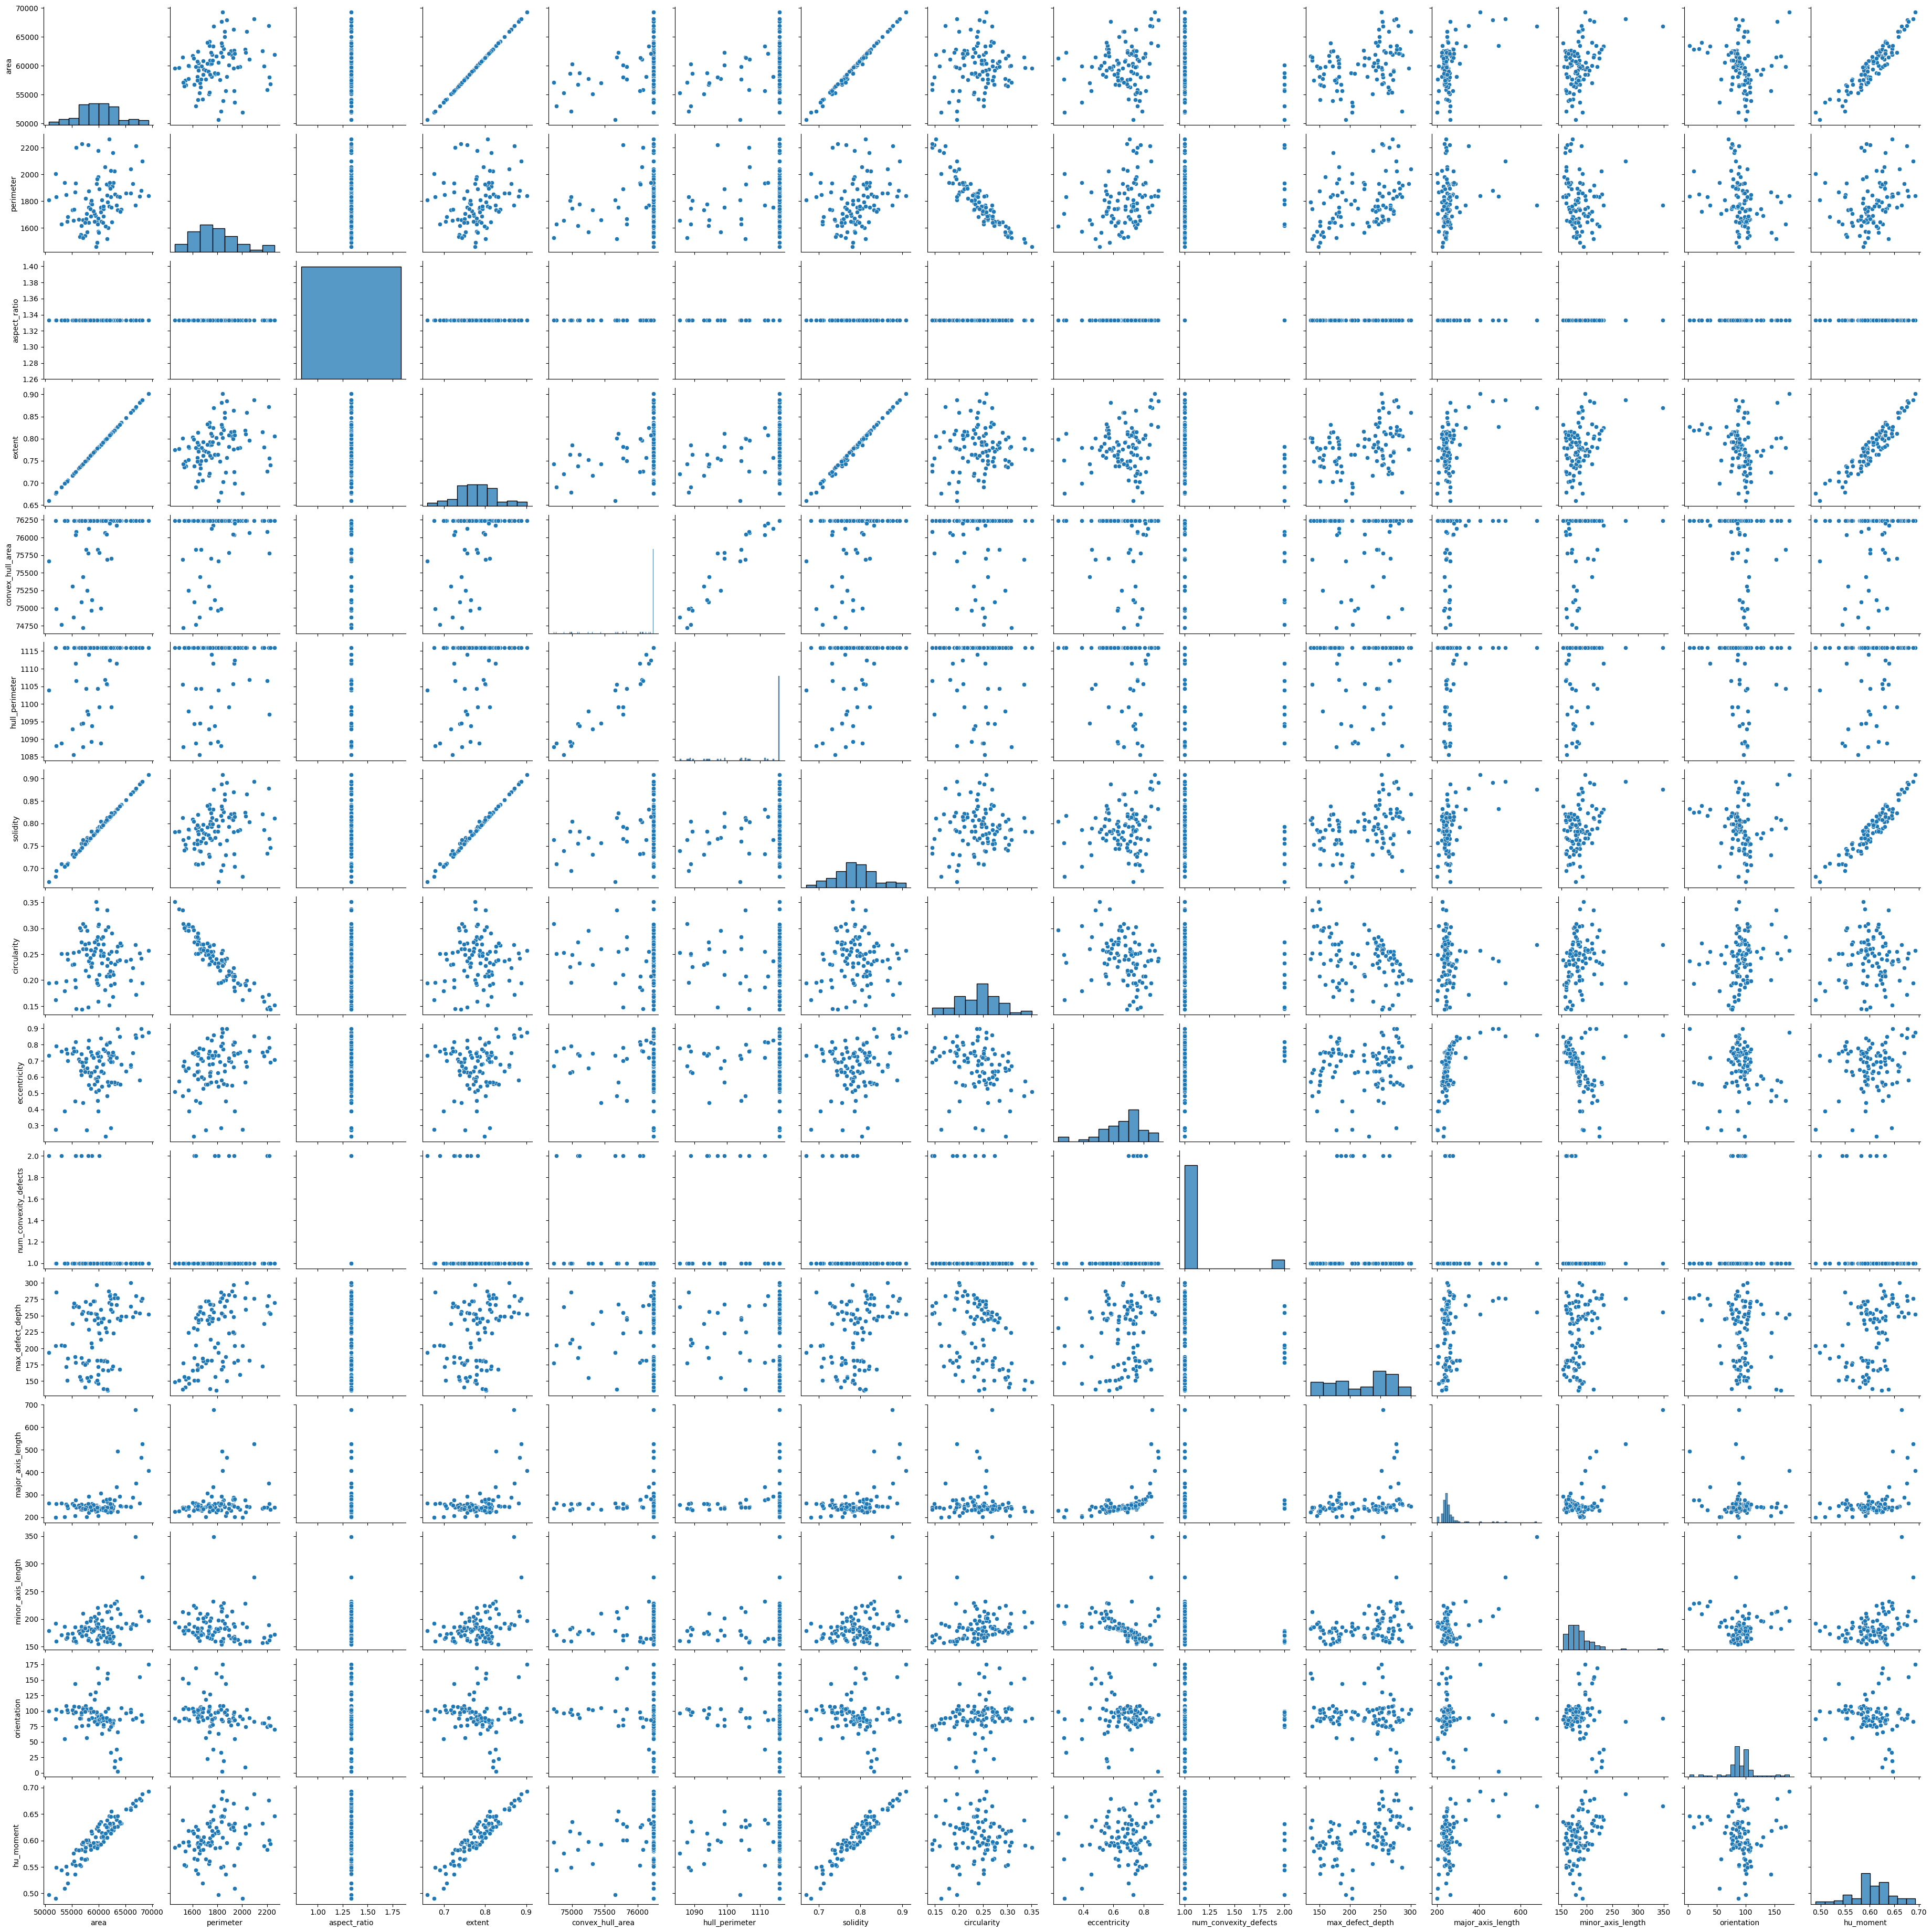

In [134]:
# Scatterplots
# Create one big pairplot with all the features paired against each other
sns.pairplot(train_X)
plt.show()
        

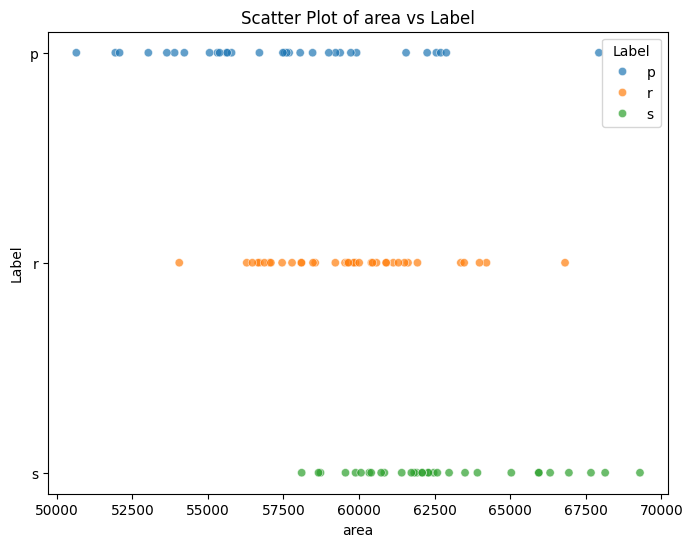

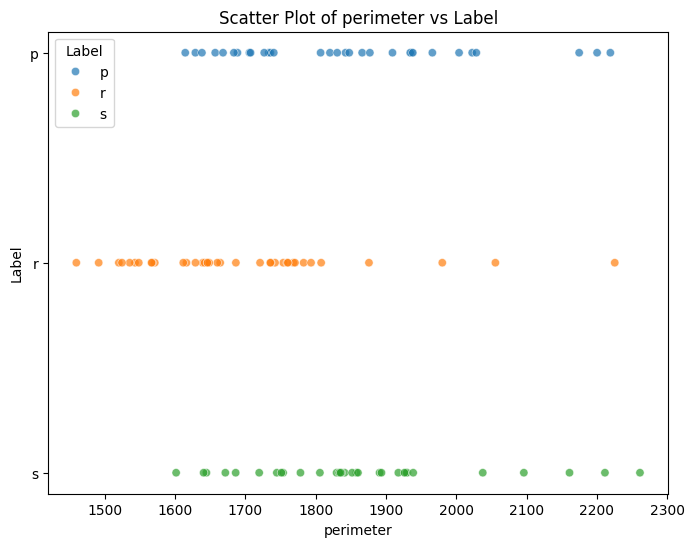

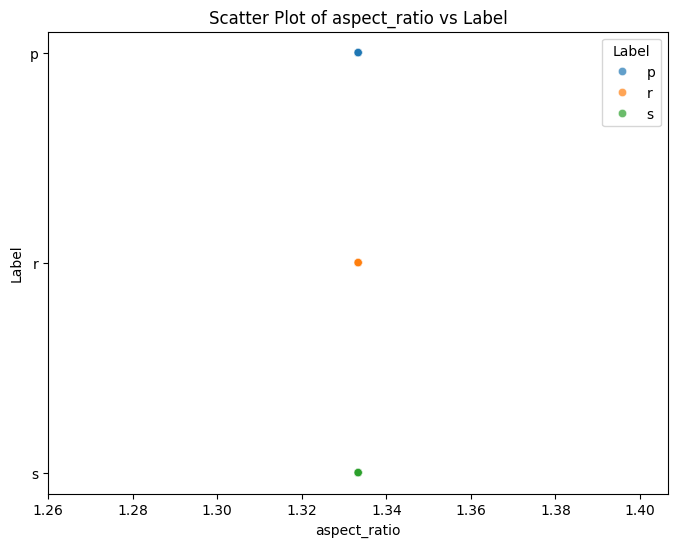

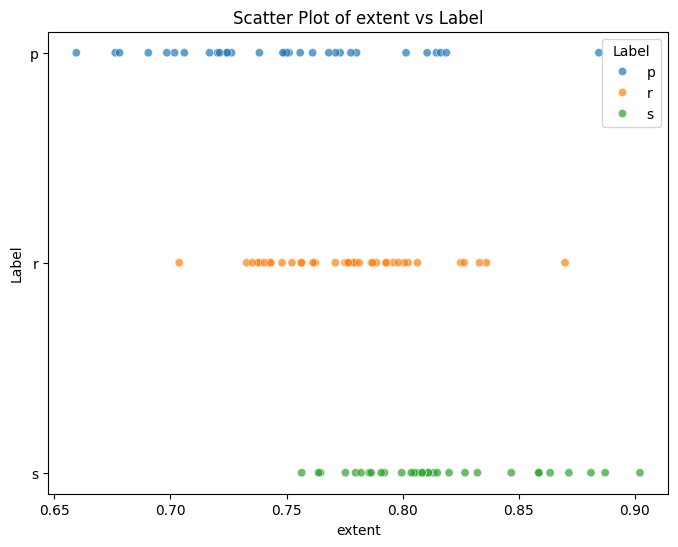

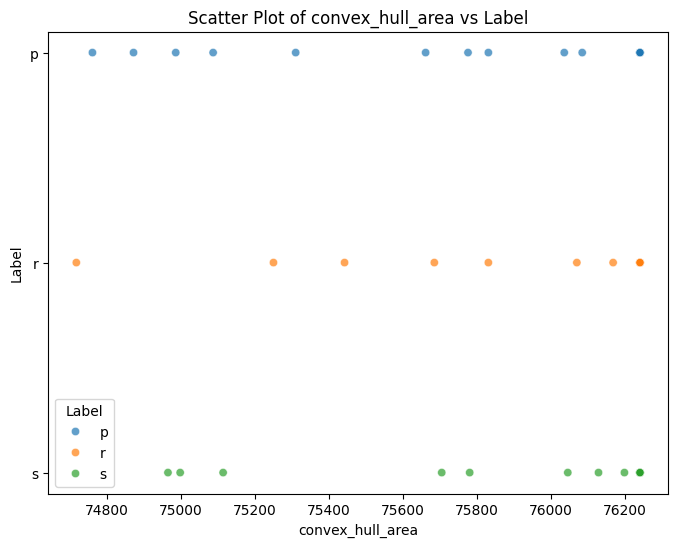

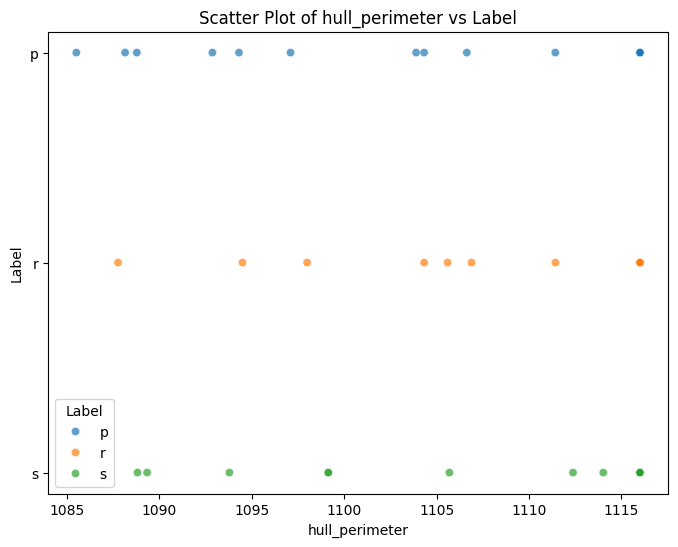

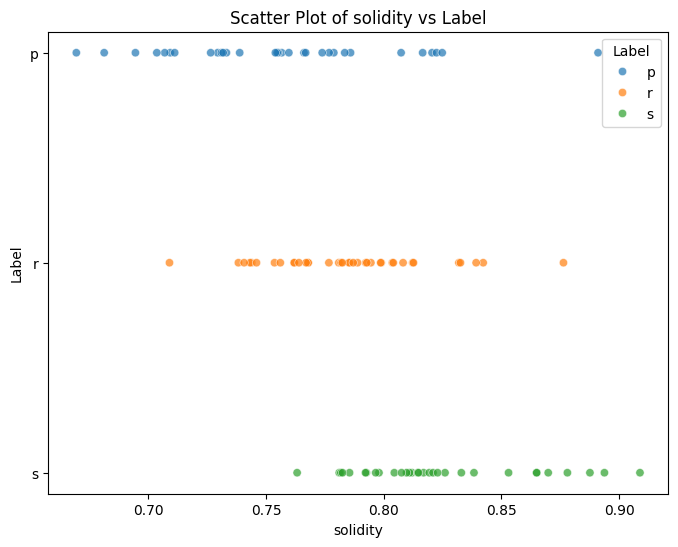

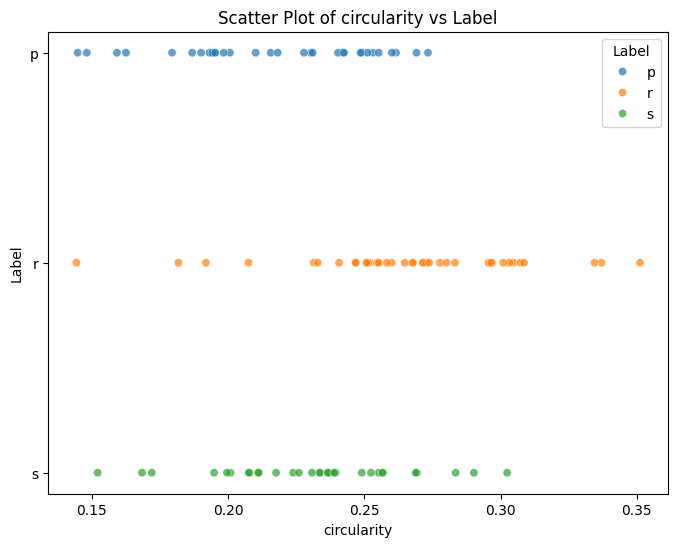

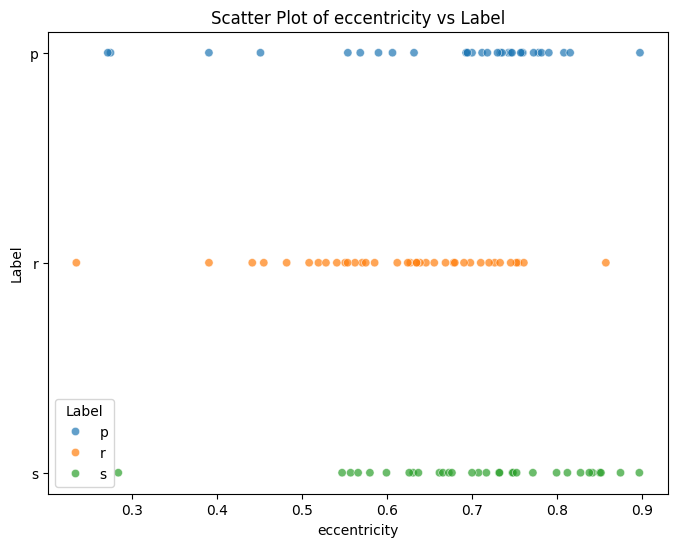

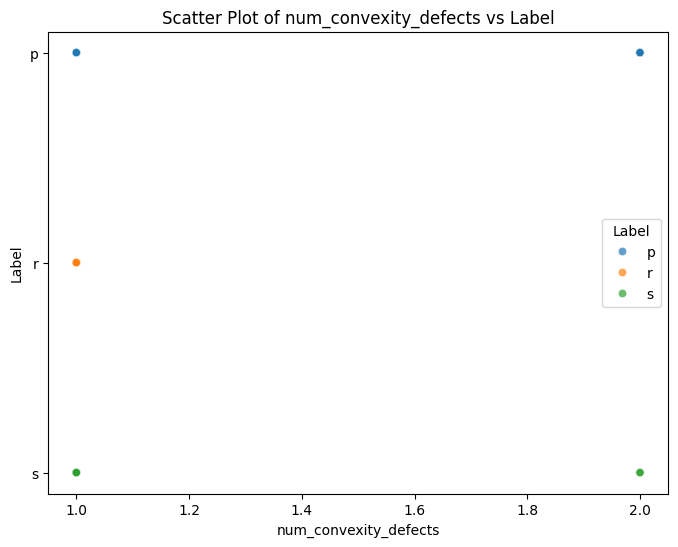

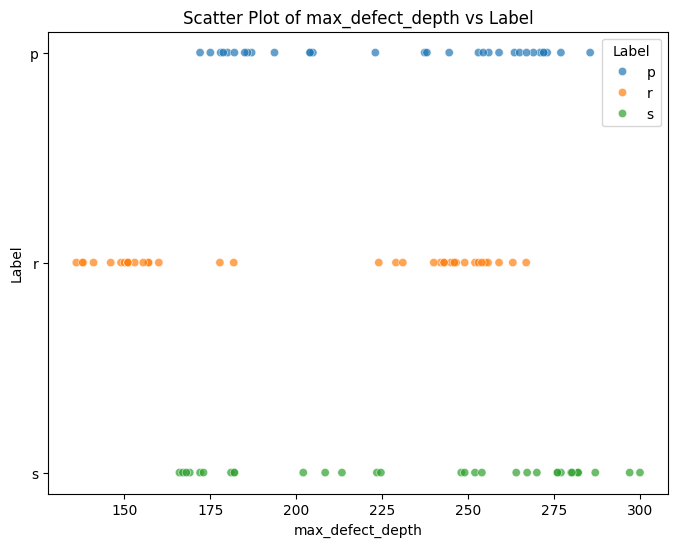

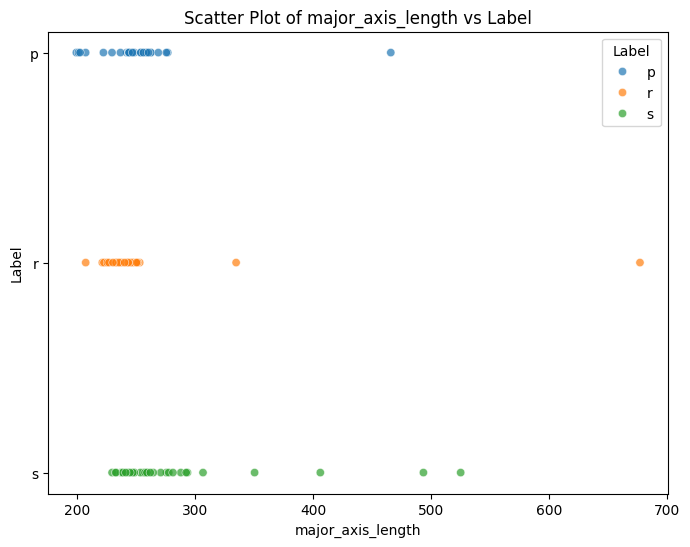

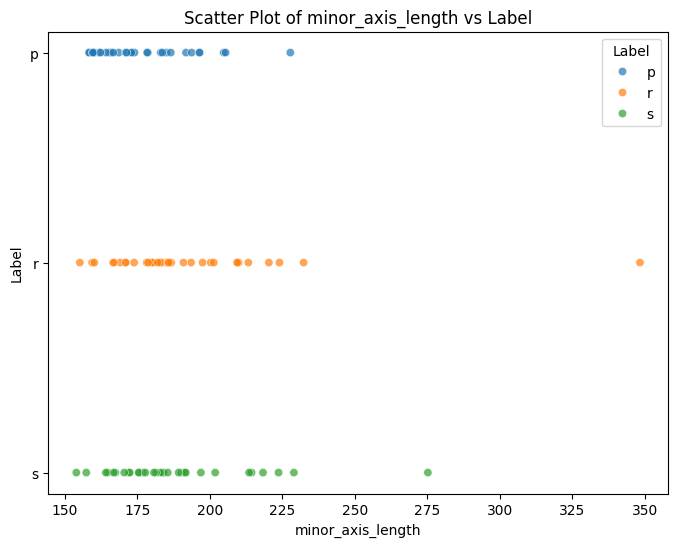

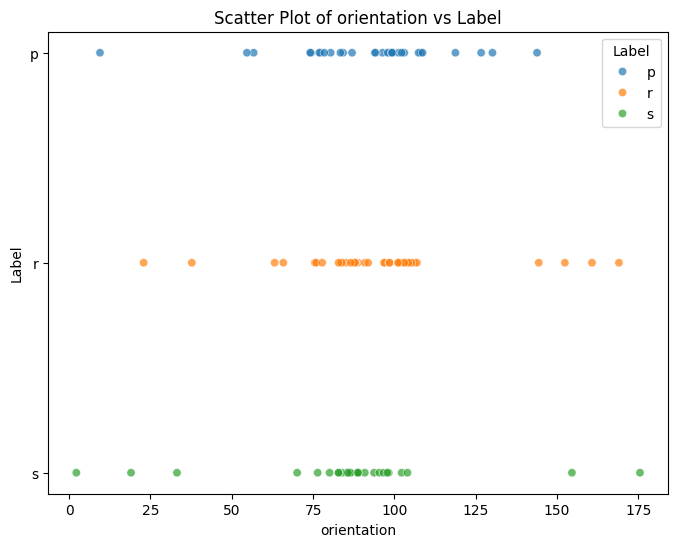

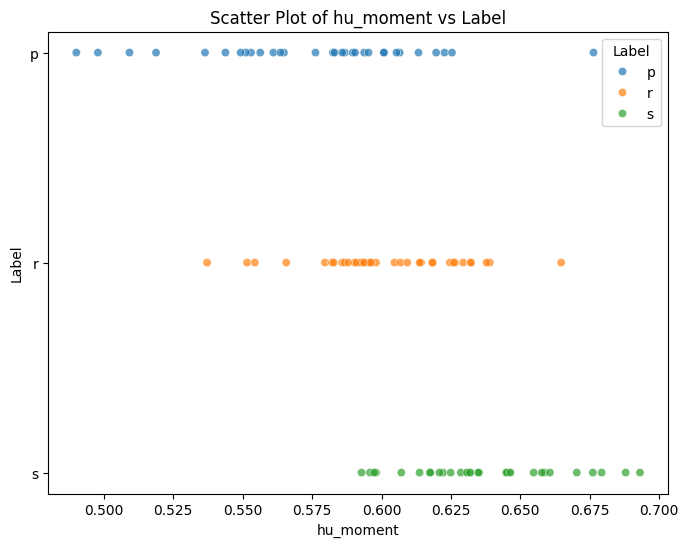

In [135]:
# Pairplot against target feature
train_data = pd.DataFrame(train_X, columns=feature_names)
train_data[LABEL] = train_y

for feature in feature_names:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_data, x=feature, y=LABEL, hue=LABEL, alpha=0.7)
    plt.title(f'Scatter Plot of {feature} vs {LABEL}')
    plt.xlabel(feature)
    plt.ylabel(LABEL)
    plt.legend(title=LABEL)
    plt.show()

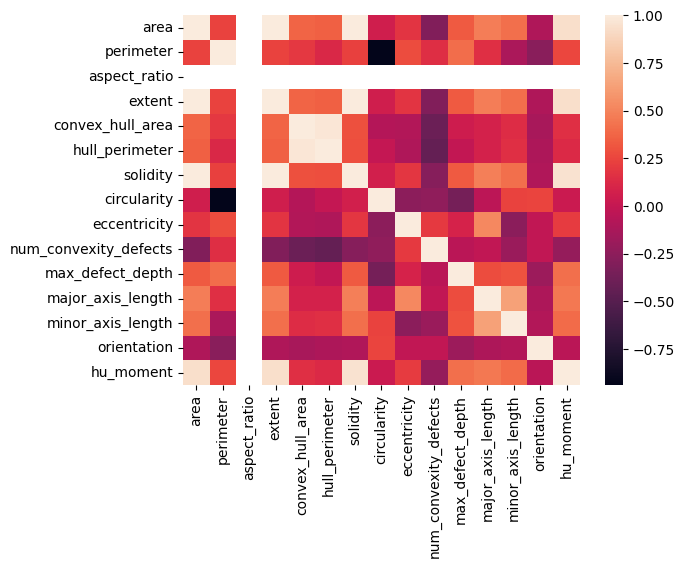

In [136]:
# Heat scatterplots
sns.heatmap(corr,annot=False)
plt.show()